## Firdavs Yusupov


In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import r2_score
from pandas.io.formats.printing import PrettyDict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [136]:
df = pd.read_csv('auto_costs.csv')
df.head(11)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Test code

In [137]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [138]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

## Clean 

In [139]:
df.name = df.name.apply(lambda x: x.split(' ')[0])
df.head(11)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [140]:
def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6, 'eight':8, 'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

df['cylindernumber'] = df['cylindernumber'].apply(lambda x: calc_num_cylinders(x))


def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0

df['doornumbers'] = df['doornumbers'].apply(lambda x: calc_num_doors (x))


def clean_name(brend):
  models = {'maxda': 'mazda', 'Nissan': 'nissan','porcshce': 'porsche','toyouta': 'toyota',
       'vokswagen': 'volkswagen', 'vw': 'volkswagen'}
  if(brend in models.keys()):
        return models[brend]
  else:
    return brend
  return 0

df['name'] = df['name'].apply(lambda x: clean_name(x))


df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [141]:
df.name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Analysis 

In [142]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]
figalpha = 0.5
axalpha = 0

left   =  0.10  # левая сторона сюжетов рисунка
right  =  0.95    # правая часть подграфиков рисунка
bottom =  0.2    # нижняя часть сюжетов рисунка
top    =  0.3    # вершина подграфиков фигуры
wspace =  0.1     # количество ширины, зарезервированной для пустого пространства между подграфиками
hspace = 0.1 # высота, зарезервированная для пустого пространства между участками
y_title_margin = 1.0 # Количество места над заголовками

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'convertible'),
 Text(1, 0, 'hatchback'),
 Text(2, 0, 'sedan'),
 Text(3, 0, 'wagon'),
 Text(4, 0, 'hardtop')]

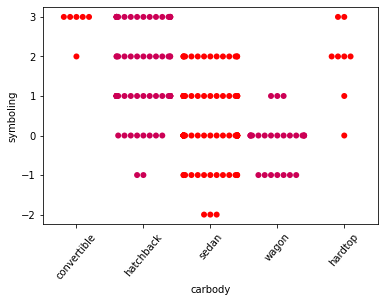

In [143]:
# Symboling
palette = ["#FF0000","#cc0055"]
sw1 = sns.swarmplot(x="carbody",y="symboling", s=6, data=df, palette=palette)
sw1.set_xticklabels(sw1.get_xticklabels(), rotation=50)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


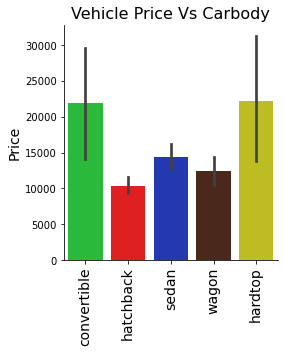

In [144]:
# Carbody
# Цена автомобиля и стиль кузова
plot_color = "#dd0033"
palette = ["#13d129","#FF0000", "#0c28c9","#522413","#d6d609"]
figalpha = 0.5
axalpha = 0

gax1=sns.factorplot(x="carbody",y="price", data=df,kind="bar", palette=palette, hue="carbody", dodge=False,size=4, aspect=1)

gax1.facet_axis(0,0).set_title("Vehicle Price Vs Carbody", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Price", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)

[Text(0, 0, 'convertible'),
 Text(1, 0, 'hardtop'),
 Text(2, 0, 'hatchback'),
 Text(3, 0, 'sedan'),
 Text(4, 0, 'wagon')]

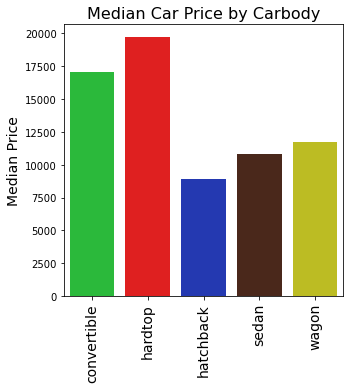

In [145]:
# Средняя цена автомобиля по типу кузова
y_title_margin = 1.0 

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1)

fig.patch.set_alpha(0.5)
ax.set_title("Median Car Price by Carbody", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0) 

grp1=df.groupby('carbody')['price'].median().reset_index()
gax=sns.barplot(x='carbody', y='price', data=grp1, palette=palette, ax=ax)
ax.set_ylabel('Median Price',fontsize=14 )
ax.set_xlabel('',fontsize=14)
gax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14)

Text(0.5, 0, 'Horsepower')

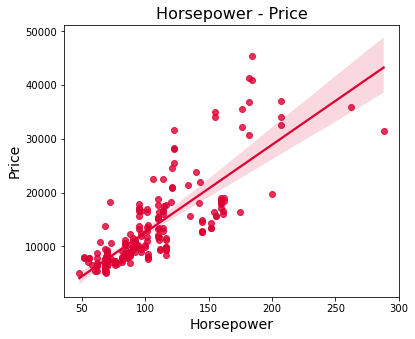

In [146]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) 

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax8=sns.regplot(x ="horsepower",y ='price', data=df, color=plot_color)
gax8.set_ylabel('Price',fontsize=14 )
gax8.set_xlabel('Horsepower',fontsize=14)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

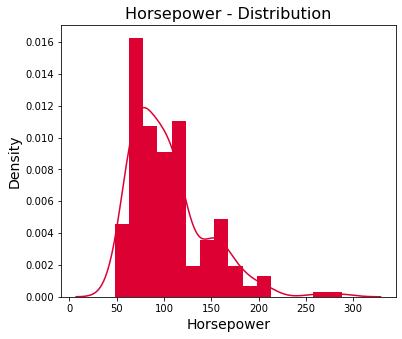

In [147]:
# Horsepower
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # получить объекты фигуры и оси

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax6=sns.distplot(df['horsepower'],kde=True, ax=ax, color= plot_color, hist_kws=dict(alpha=1))
gax6.set_ylabel('Density', fontsize=14)
gax6.set_xlabel('Horsepower', fontsize=14)
df['horsepower'].describe()

In [148]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [149]:
# correlation
df[['cylindernumber', 'price', 'wheelbase', 'carlength', 'carheight', 'carwidth', 'curbweight', 'enginesize','doornumbers', 'carlength' ,'compressionratio','horsepower', 'boreratio', 'peakrpm', 'citympg']].corr()

,cylindernumber,price,wheelbase,carlength,carheight,carwidth,curbweight,enginesize,doornumbers,carlength,compressionratio,horsepower,boreratio,peakrpm,citympg
cylindernumber,1.000000,0.718305,0.339507,0.430672,-0.013995,0.545007,0.609727,0.846031,-0.016009,0.430672,-0.020002,0.692016,0.231399,-0.124172,-0.445837
price,0.718305,1.000000,0.577816,0.682920,0.119336,0.759325,0.835305,0.874145,0.031835,0.682920,0.067984,0.808139,0.553173,-0.085267,-0.685751
wheelbase,0.339507,0.577816,1.000000,0.874587,0.589435,0.795144,0.776386,0.569329,0.447357,0.874587,0.249786,0.353294,0.488750,-0.360469,-0.470414
carlength,0.430672,0.682920,0.874587,1.000000,0.491029,0.841118,0.877728,0.683360,0.398568,1.000000,0.158414,0.552623,0.606454,-0.287242,-0.670909
carheight,-0.013995,0.119336,0.589435,0.491029,1.000000,0.279210,0.295572,0.067149,0.552208,0.491029,0.261214,-0.108802,0.171071,-0.320411,-0.048640
carwidth,0.545007,0.759325,0.795144,0.841118,0.279210,1.000000,0.867032,0.735433,0.207168,0.841118,0.181129,0.640732,0.559150,-0.220012,-0.642704
curbweight,0.609727,0.835305,0.776386,0.877728,0.295572,0.867032,1.000000,0.850594,0.197379,0.877728,0.151362,0.750739,0.648480,-0.266243,-0.757414
enginesize,0.846031,0.874145,0.569329,0.683360,0.067149,0.735433,0.850594,1.000000,0.020742,0.683360,0.028971,0.809769,0.583774,-0.244660,-0.653658
doornumbers,-0.016009,0.031835,0.447357,0.398568,0.552208,0.207168,0.197379,0.020742,1.000000,0.398568,0.177888,-0.126947,0.119258,-0.247668,-0.012417
carlength,0.430672,0.682920,0.874587,1.000000,0.491029,0.841118,0.877728,0.683360,0.398568,1.000000,0.158414,0.552623,0.606454,-0.287242,-0.670909


<AxesSubplot:title={'center':'Engine Specs - Correlations'}>

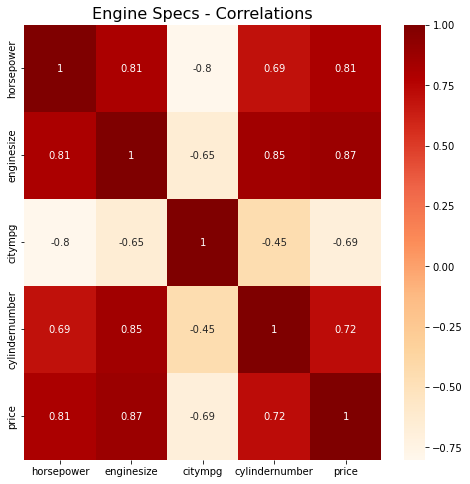

In [150]:
# Технические характеристики двигателя — корреляции
fig, ax = plt.subplots(figsize=(8,8), ncols=1, nrows=1)

fig.patch.set_alpha(0.5)
ax.set_title("Engine Specs - Correlations", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

sns.heatmap(df[['horsepower', 'enginesize','citympg','cylindernumber','price']].corr(),cmap="OrRd",annot=True, ax=ax)

<AxesSubplot:xlabel='fueltypes', ylabel='price'>

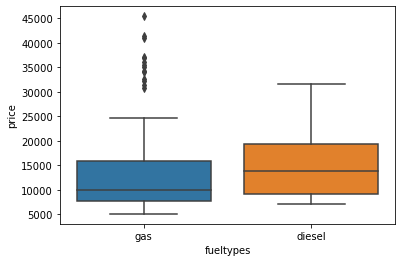

In [151]:
sns.boxplot(x="fueltypes", y="price", data=df)

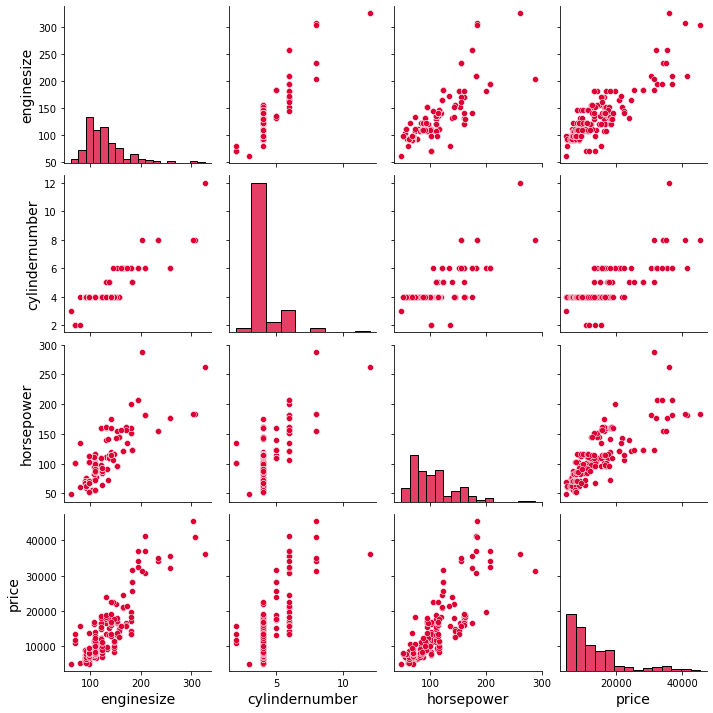

In [152]:
gplt= sns.pairplot(df[['carbody', 'enginesize', 'cylindernumber', 'horsepower', 'price']], kind='scatter', diag_kind='hist',diag_kws=dict(color=plot_color, linewidth=1),plot_kws=dict(color=plot_color))

xlabels,ylabels = [],[]
gplt.fig.patch.set_alpha(figalpha)

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

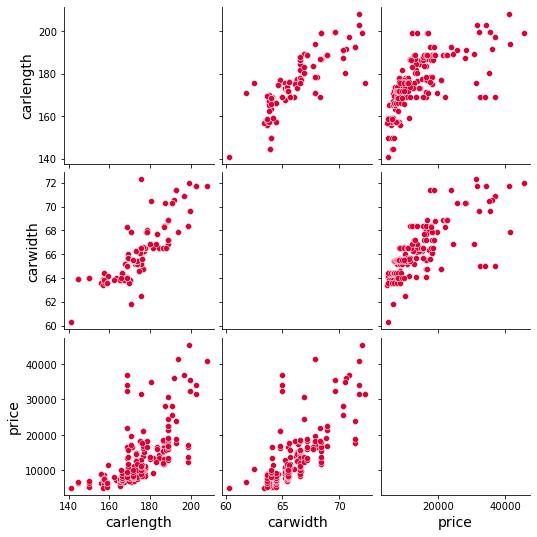

In [153]:
# Ref:https://en.wikipedia.org/wiki/Car_classification
xlabels,ylabels = [],[]
gplt=sns.pairplot(df[['carlength','carwidth','price']], kind="scatter",diag_kind='scatter',diag_kws=dict(color=plot_color, linewidth=1),plot_kws=dict(color=plot_color))
gplt.fig.patch.set_alpha(figalpha)

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
    
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

In [154]:
# Engine Technology
df[['enginesize','price']].corr()

,enginesize,price
enginesize,1.000000,0.874145
price,0.874145,1.000000


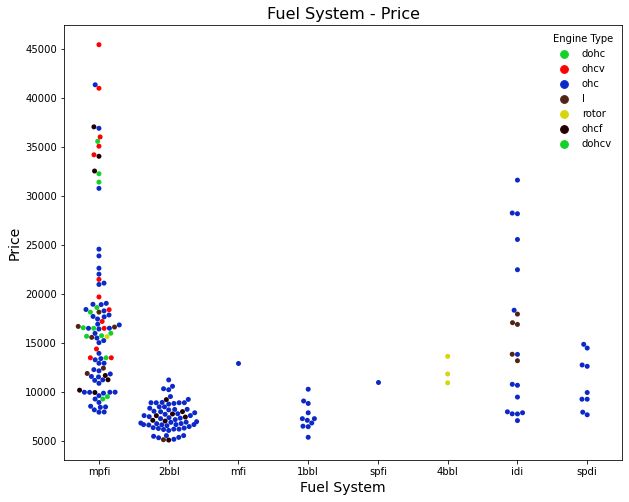

In [155]:
palette = ["#13d129","#FF0000", "#0c28c9","#522413","#d6d609", "#200000"]

fig, ax = plt.subplots(figsize=(10,8), ncols=1, nrows=1) 
fig.patch.set_alpha(0.5)

ax.set_title("Fuel System - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="fuelsystem",y="price",data=df, hue="enginetype", ax=ax, palette = palette)
gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('Fuel System',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Engine Type")

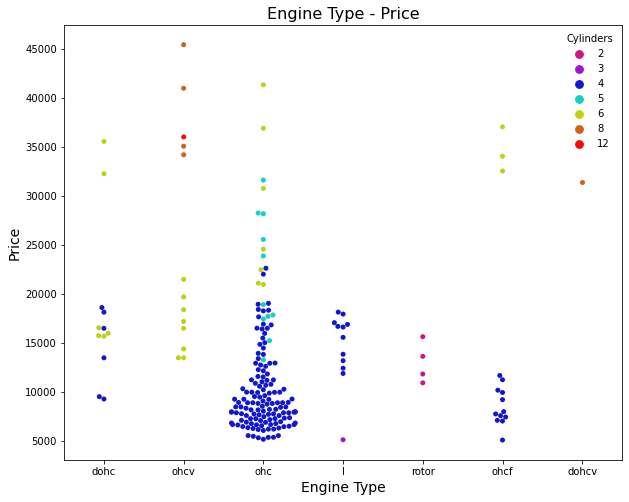

In [156]:
palette = ["#d11385","#a213d1", "#1316d1","#13d1be","#bed113", "#d16213", "#ff0505"]

fig, ax = plt.subplots(figsize=(10,8), ncols=1, nrows=1) 
fig.patch.set_alpha(0.5)

ax.set_title("Engine Type - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="enginetype",y="price",data=df, hue="cylindernumber", palette=palette, ax=ax)
gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('Engine Type',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Cylinders")

## Predict


In [157]:
# To be continued ....

In [158]:
dfd = df[['symboling', 'doornumbers', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
          'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
dfd

,symboling,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [179]:
# X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',  'enginesize',  'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
# y = df['price']

# pred = linear_model.LinearRegression().fit(X.values, y).predict([[3, 88.6, 168.8, 64.1, 48.8, 2548, 130,  2.68, 9.0, 111, 5000, 21, 27]])
# #pred = linear_model.LinearRegression().fit(X.values, y).predict([[-1, 109.1, 188.8, 68.9, 55.5, 2952, 141,  3.15, 9.5, 114, 5400, 23, 28]])

# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)

# model = DecisionTreeRegressor()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print(f"Model Accuracy: {round(r2_score(y_test,y_pred)*100)}%")
# print('Predictions:', pred, '\n\n')


Model Accuracy: 95%
Predictions: [12973.91874627] 




In [193]:
X = df[['carlength', 'curbweight', 'horsepower']]
y = df['price']

pred = linear_model.LinearRegression().fit(X.values, y).predict([[168.8,   2548, 111]])
#pred = linear_model.LinearRegression().fit(X.values, y).predict([[-1, 109.1, 188.8, 68.9, 55.5, 2952, 141,  3.15, 9.5, 114, 5400, 23, 28]])

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Model Accuracy: {round(r2_score(y_test,y_pred)*100)}%")
print('Predictions:', pred, '\n\n')


Model Accuracy: 93%
Predictions: [13881.3356267] 




In [180]:
SPARK = {'carlength': 364,  'curbweight': 1054, 'horsepower': 73}


